<h1><center> The Birthday Paradox</center></h1>


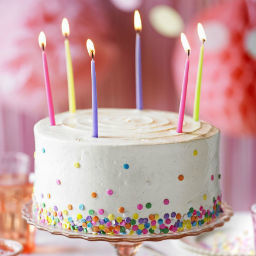


There is a pretty famous paradox regarding the birthdays of people: 

#### 'If you gather 23 people in a room and ask them what day they were born, there is a 50% chance that at least two people were born in the same day'

Sounds kind of odd, right? There are 365 days in the year to choose the birthdays from, so 23 people seems like not enough to have a 50-50 chance of getting a match.

Showing that this is actually true is pretty straightforward. Let's begin by asking ourselves: 

#### if we have just 2 people what are the chances of them NOT having the same birthday?

That is pretty easy and we will call it $P_{2}(\textbf{NO})$. The first person can choose whatever day they like. The second person can only choose from the remaining 364 days. This means that the chances of our birthdays being different are:

\begin{equation}
P_{2}(\textbf{NO}) = \frac{364}{365} = 0.99726
\end{equation}

Which means that 99.73% of the times (almost always) our birthdays won't match. So how come there is almost no chance of having a match when we consider 2 people, but there is a 50-50 chance when we consider 23 people? To answer that we need to look at 

#### how many pairs can we form with 23 people available?
That's a common question in combinatorics: "how many groups of 2 items can we form from a collection of 23 items, disregarding order?" That's just $C(23, 2)$ which is given by:

\begin{equation}
C(n, k) = \frac{n!}{(n-k)!k!}
\end{equation}

In this case there are 253 distinct pairs in a group of 23 people.

\begin{equation}
C(23, 2) = \frac{23!}{(21)!2!} = \frac{23 \cdot 22}{2} = 253
\end{equation}

At this point we can tackle our real question:

#### what is the probability of at least 2 people having the exact same birthday in a group of 23
Let's call that $P_{23}(\textbf{YES})$. Like in many other situations when dealing with probability, it is easier to work out the opposite situation $P_{23}(\textbf{NO})$ and realise that the probabilities must add up to 1. So, what is the probability of 2 people NOT having the same birthday in a group of 23?

Well, we know that the probability of that for a single pair is $\frac{364}{365}$. When the group is 23, that needs to hold for every possible pair of 2 people within the group, in this case 253 pairs. This is a typical case of conditional probability, similar to the question of "what are the chances of getting tails in 5 consecutive coin tosses". 

\begin{equation}
P(A, B, C, \dots) = P(A) P(B) P(C) \dots 
\end{equation}

So in our case when all probabilities $P_{2}(\textbf{NO})$ are identical, the formula boils down to the chances to multiplying $P_{2}(\textbf{NO})$ as many times as there are pairs in our group of 23

\begin{equation}
P_{23}(\textbf{NO}) = (P_{2}(\textbf{NO}))^{253} = \left(\frac{364}{365}\right)^{253} = 0.49952
\end{equation}

What we just found is the opposite to what we were looking for $P_{23}(\textbf{YES})$ so

\begin{equation}
P_{23}(\textbf{YES}) = 1 - P_{23}(\textbf{NO}) \simeq 0.50
\end{equation}

In conclusion, it really is true that the chances in a group of 23 people are essentially 50%.

### Putting the Paradox to the test
In case you are a skeptic and do not fully believe in the formulas from above, you still have a powerful tool to work this problem out: using brute force and a computer. We will use the good old method for working probabilities of running the experiment thousands of times and simple report the observed frequencies



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def check_birthdays(N_people, N_runs, display=True):
    """
    Randomly chooses the birthdays of N_people
    Checks whether some birthdays are the same
    Repeats the process N_runs
    """
    N_days = 365
    counts = 0
    for k in range(N_runs):
        days = np.random.choice(N_days, N_people)
        unique_days = np.unique(days)
        if unique_days.shape[0] != N_people:
            counts += 1
            
    if display:
        print('Checking the birthdays of %d people (%d runs)' %(N_people, N_runs))
        print('%d out of %d times a birthday was repeated' %(counts, N_runs))
    return counts/N_runs  
    

In [34]:
N_runs = 1000
N_people = 23

p = check_birthdays(N_people, N_runs)

Checking the birthdays of 23 people (1000 runs)
477 out of 1000 times a birthday was repeated


We can see that the birthdays tend to be repeated around 50% of the times, just like the paradox indicated, which confirms that our reasoning was correct.

### Generalization to any group of people

We have just looked at the case of 23 people, but it is easy to generalize our formulas to a group containing any number $n$ of people. We just need to know how many possible pairs can we form, which is given by:

\begin{equation}
C(n, 2) = \frac{n!}{(n-2)!2!} = \frac{n (n-1)}{2}
\end{equation}

And combine the probability of not having the same birthday in a single pair, that many times.

\begin{equation}
P_n(\textbf{YES}) = 1 - P_n(\textbf{NO}) = 1 - \left( \frac{364}{365} \right)^{n (n-1)/2}
\end{equation}

### Testing for the general case

Now that we have a formula that tells us the probability for any group size $n$ and a function that estimates that probability numerically, we can generalize our test to any number of people and see if the results are consistent

In [35]:
def formal_probability(N_people):
    n = N_people * (N_people - 1) / 2
    P = 1 - (364/365)**n
    return P

N_max = 100
group_sizes = np.arange(2, 100)
theoretical = []
numerical = []

for group_size in group_sizes:
    theoretical.append(formal_probability(group_size))
    numerical.append(check_birthdays(group_size, N_runs, display=False))
    

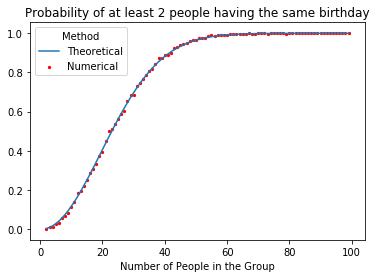

In [43]:
plt.figure()
plt.plot(group_sizes, theoretical, label='Theoretical')
plt.scatter(group_sizes, numerical, label='Numerical', s=5, color='Red')
plt.legend(title='Method')
plt.xlabel('Number of People in the Group')
plt.title('Probability of at least 2 people having the same birthday')
plt.show()

We can see that the numerical results match the theoretical predictions quite well and that for group sizes of more around 50 people or more, there essentially no chance of everyone having different birthdays.